# Read Dataset

In [36]:
import pandas as pd
car = pd.read_csv("C:/Documents/DataScience/Cars93.csv")
car.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [37]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [38]:
car.columns =['id', 'Manufacturer', 'Model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'RevPerMile',
       'ManTransAvail', 'FuelTankCapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'TurnCircle', 'RearSeatRoom', 'LuggageRoom',
       'Weight', 'Origin', 'Make']

# Dealing with Missing Data

In [39]:
for i in car.columns:
    if(car[i].dtype=='object'):
        x = car[i].mode()[0]
        car[i] = car[i].fillna(x)
    else:
        x = car[i].mean()
        car[i] = car[i].fillna(x)

In [40]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                93 non-null     int64  
 1   Manufacturer      93 non-null     object 
 2   Model             93 non-null     object 
 3   Type              93 non-null     object 
 4   MinPrice          93 non-null     float64
 5   Price             93 non-null     float64
 6   MaxPrice          93 non-null     float64
 7   MPGcity           93 non-null     int64  
 8   MPGhighway        93 non-null     int64  
 9   AirBags           93 non-null     object 
 10  DriveTrain        93 non-null     object 
 11  Cylinders         93 non-null     object 
 12  EngineSize        93 non-null     float64
 13  Horsepower        93 non-null     int64  
 14  RPM               93 non-null     int64  
 15  RevPerMile        93 non-null     int64  
 16  ManTransAvail     93 non-null     object 
 17 

# Define Y and X

In [41]:
Y = car[["Type"]]
X = car.drop(labels=["Type","id","Make"],axis=1)

# Feature selection based on EDA

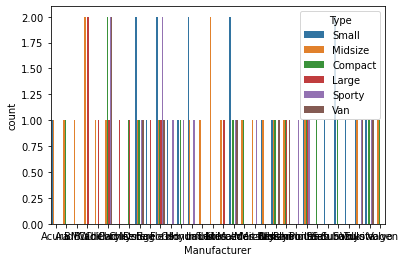

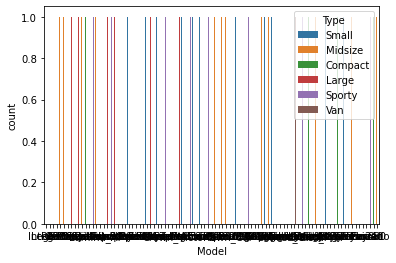

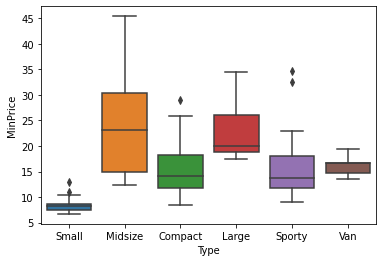

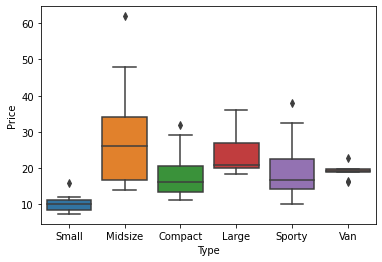

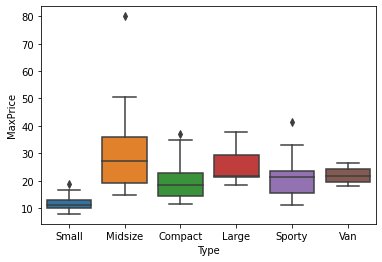

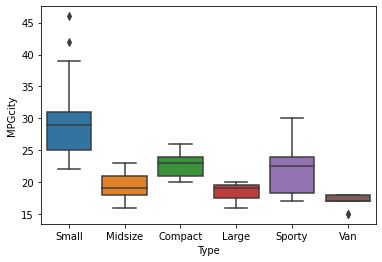

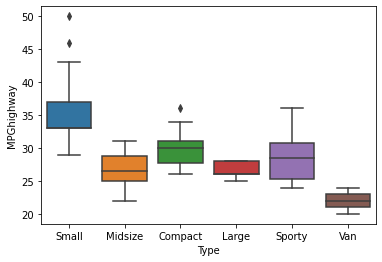

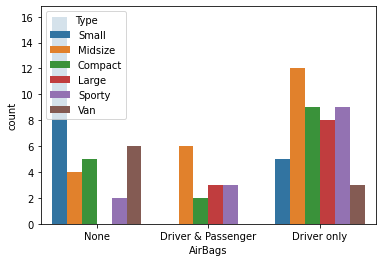

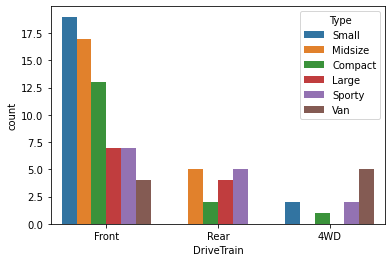

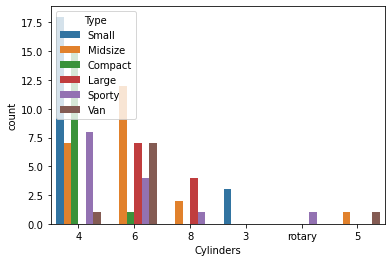

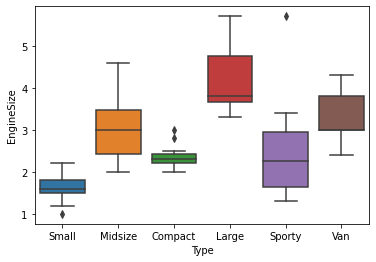

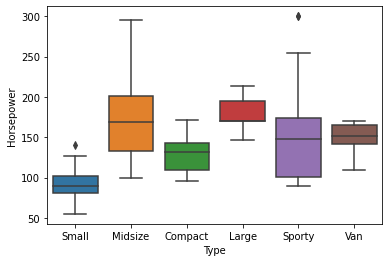

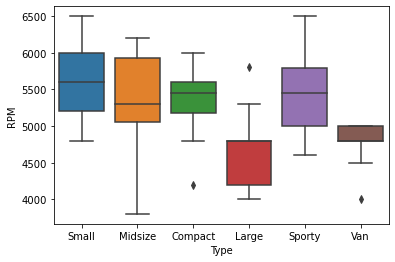

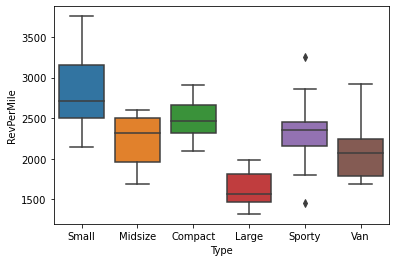

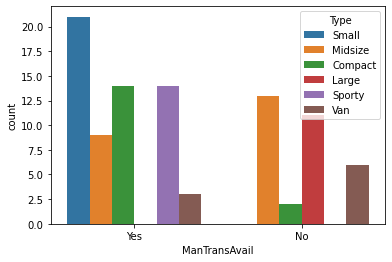

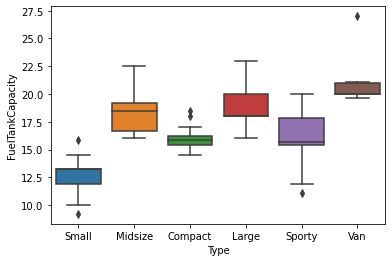

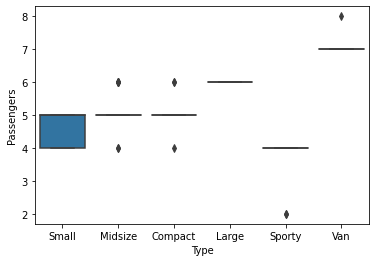

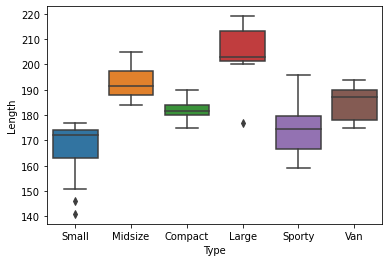

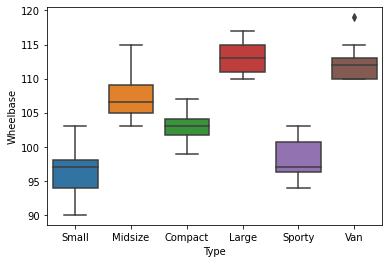

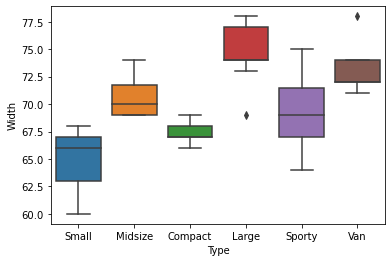

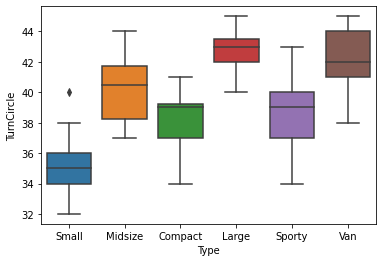

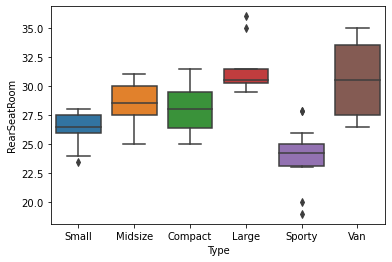

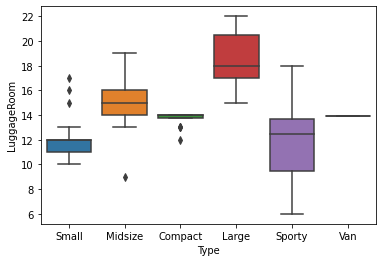

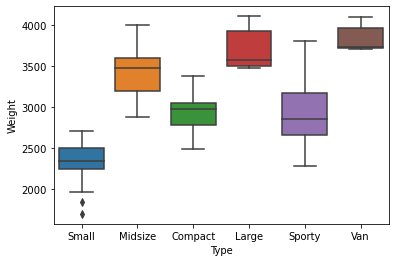

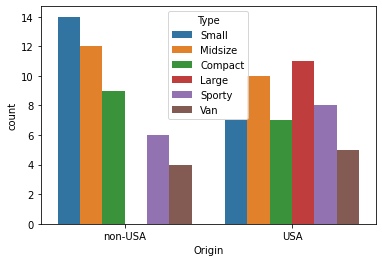

In [42]:
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
for i in X.columns:
    if(X[i].dtypes=="object"):
        sb.countplot(X[i],hue=Y.Type)
        plt.show()
    else:
        sb.boxplot(Y.Type,X[i])
        plt.show()

In [43]:
cat=[]
con =[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [44]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

imp_con_cols = []
for i in X[con]:
    if(X[i].dtypes!="object"):
        x = ANOVA(car,"Type",i)
        if(x < 0.05):
            print("Type vs ",i,"-->",x)
            imp_con_cols.append(i)

Type vs  MinPrice --> 0.0
Type vs  Price --> 0.0
Type vs  MaxPrice --> 0.0
Type vs  MPGcity --> 0.0
Type vs  MPGhighway --> 0.0
Type vs  EngineSize --> 0.0
Type vs  Horsepower --> 0.0
Type vs  RPM --> 0.0
Type vs  RevPerMile --> 0.0
Type vs  FuelTankCapacity --> 0.0
Type vs  Passengers --> 0.0
Type vs  Length --> 0.0
Type vs  Wheelbase --> 0.0
Type vs  Width --> 0.0
Type vs  TurnCircle --> 0.0
Type vs  RearSeatRoom --> 0.0
Type vs  LuggageRoom --> 0.0
Type vs  Weight --> 0.0


In [45]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    ct = pd.crosstab(df[cat1], df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

imp_cat_cols = []
for i in X[cat]:
    if(X[i].dtypes=="object"):
        x = chisquare(car,"Type",i)
        if(x < 0.05):
            print("Type vs ",i,"-->",x)
            imp_cat_cols.append(i)

Type vs  AirBags --> 0.00022621310210534361
Type vs  DriveTrain --> 0.00012480179759447616
Type vs  Cylinders --> 1.674244316924938e-07
Type vs  ManTransAvail --> 3.661469229213669e-10
Type vs  Origin --> 0.015110051037674484


# Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[imp_con_cols]), columns=imp_con_cols)
X2 = pd.get_dummies(X[imp_cat_cols])
Xnew = X1.join(X2)
Xnew

,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,EngineSize,Horsepower,RPM,RevPerMile,FuelTankCapacity,...,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,ManTransAvail_No,ManTransAvail_Yes,Origin_USA,Origin_non-USA
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0,1,0,0,0,0,0,1,0,1
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0,0,0,1,0,0,0,1,0,1
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0,0,0,1,0,0,0,1,0,1
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0,0,0,1,0,0,0,1,0,1
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,...,0,0,1,0,0,0,0,1,0,1
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,...,0,1,0,0,0,0,0,1,0,1
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0,0,0,1,0,0,0,1,0,1
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0,1,0,0,0,0,0,1,0,1


In [47]:
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MinPrice                    93 non-null     float64
 1   Price                       93 non-null     float64
 2   MaxPrice                    93 non-null     float64
 3   MPGcity                     93 non-null     float64
 4   MPGhighway                  93 non-null     float64
 5   EngineSize                  93 non-null     float64
 6   Horsepower                  93 non-null     float64
 7   RPM                         93 non-null     float64
 8   RevPerMile                  93 non-null     float64
 9   FuelTankCapacity            93 non-null     float64
 10  Passengers                  93 non-null     float64
 11  Length                      93 non-null     float64
 12  Wheelbase                   93 non-null     float64
 13  Width                       93 non-nu

# Split the Data

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2, random_state=31)

# Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=31,min_samples_split=5)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print(round(tr_acc,3))
print(round(ts_acc,3))

1.0
0.789


# Pruning the Model

In [50]:
for i in range(2,50,1):
    rfc = RandomForestClassifier(random_state=31,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    print(i)
    print(tr_acc,"\t\t", ts_acc)
    print("------------*--------")

2
1.0 		 0.7894736842105263
------------*--------
3
1.0 		 0.7894736842105263
------------*--------
4
1.0 		 0.7368421052631579
------------*--------
5
1.0 		 0.7894736842105263
------------*--------
6
1.0 		 0.7894736842105263
------------*--------
7
1.0 		 0.8421052631578947
------------*--------
8
1.0 		 0.8421052631578947
------------*--------
9
1.0 		 0.8421052631578947
------------*--------
10
1.0 		 0.8421052631578947
------------*--------
11
1.0 		 0.8421052631578947
------------*--------
12
1.0 		 0.7894736842105263
------------*--------
13
1.0 		 0.7894736842105263
------------*--------
14
0.972972972972973 		 0.7894736842105263
------------*--------
15
0.9864864864864865 		 0.7894736842105263
------------*--------
16
0.972972972972973 		 0.7894736842105263
------------*--------
17
0.972972972972973 		 0.6842105263157895
------------*--------
18
0.972972972972973 		 0.7368421052631579
------------*--------
19
0.9324324324324325 		 0.7368421052631579
------------*--------
20
0

In [51]:
for i in range(2,50,1):
    rfc = RandomForestClassifier(random_state=31,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    print(i)
    print(tr_acc,"\t\t", ts_acc)
    print("------------*--------")

2
0.8918918918918919 		 0.631578947368421
------------*--------
3
1.0 		 0.8421052631578947
------------*--------
4
1.0 		 0.7894736842105263
------------*--------
5
1.0 		 0.7894736842105263
------------*--------
6
1.0 		 0.7894736842105263
------------*--------
7
1.0 		 0.7894736842105263
------------*--------
8
1.0 		 0.7894736842105263
------------*--------
9
1.0 		 0.7894736842105263
------------*--------
10
1.0 		 0.7894736842105263
------------*--------
11
1.0 		 0.7894736842105263
------------*--------
12
1.0 		 0.7894736842105263
------------*--------
13
1.0 		 0.7894736842105263
------------*--------
14
1.0 		 0.7894736842105263
------------*--------
15
1.0 		 0.7894736842105263
------------*--------
16
1.0 		 0.7894736842105263
------------*--------
17
1.0 		 0.7894736842105263
------------*--------
18
1.0 		 0.7894736842105263
------------*--------
19
1.0 		 0.7894736842105263
------------*--------
20
1.0 		 0.7894736842105263
------------*--------
21
1.0 		 0.7894736842105

In [52]:
for i in range(2,50,1):
    rfc = RandomForestClassifier(random_state=31,min_samples_leaf=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    print(i)
    print(tr_acc,"\t\t", ts_acc)
    print("------------*--------")

2
1.0 		 0.7894736842105263
------------*--------
3
1.0 		 0.7894736842105263
------------*--------
4
1.0 		 0.7894736842105263
------------*--------
5
0.9864864864864865 		 0.7894736842105263
------------*--------
6
0.9864864864864865 		 0.7368421052631579
------------*--------
7
0.9594594594594594 		 0.7368421052631579
------------*--------
8
0.9459459459459459 		 0.6842105263157895
------------*--------
9
0.9054054054054054 		 0.6842105263157895
------------*--------
10
0.8513513513513513 		 0.631578947368421
------------*--------
11
0.7432432432432432 		 0.5789473684210527
------------*--------
12
0.7027027027027027 		 0.5789473684210527
------------*--------
13
0.6351351351351351 		 0.5789473684210527
------------*--------
14
0.6216216216216216 		 0.5789473684210527
------------*--------
15
0.6216216216216216 		 0.5789473684210527
------------*--------
16
0.5405405405405406 		 0.5789473684210527
------------*--------
17
0.4864864864864865 		 0.5263157894736842
------------*-------

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=31,min_samples_split=8)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print(round(tr_acc,3))
print(round(ts_acc,3))

1.0
0.842


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=31,max_depth=3)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

print(round(tr_acc,3))
print(round(ts_acc,3))

1.0
0.842


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred_ts)

array([[2, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0],
       [0, 1, 5, 0, 0, 0],
       [0, 0, 0, 3, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

# Predication

In [56]:
ytest['Car_Type_Prediction']=pred_ts

In [57]:
ytest.sort_values(by=["Type","Car_Type_Prediction"])

,Type,Car_Type_Prediction
77,Compact,Compact
2,Compact,Compact
51,Large,Large
76,Large,Large
7,Large,Large
17,Large,Large
60,Midsize,Large
8,Midsize,Midsize
36,Midsize,Midsize
62,Midsize,Midsize
